In [1]:
import sys
import pandas as pd
sys.path.insert(0, '/10 A KAI 2/Week 4/Sales_Forcasting/') 

In [2]:
from Scripts.EDA import BASICEDA

In [3]:
df1 = pd.read_csv('../Data/store.csv')
df2 = pd.read_csv('../Data/train.csv')
df3 = pd.read_csv('../Data/test.csv')

C:\Users\marta\AppData\Local\Temp\ipykernel_4080\636959854.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../Data/train.csv')


In [4]:
df1

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [5]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
EDA = BASICEDA(df2,df3,df1)

2024-09-20 15:51:26,414 - INFO - Checking the distribution of promotions in the training and test datasets...


Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


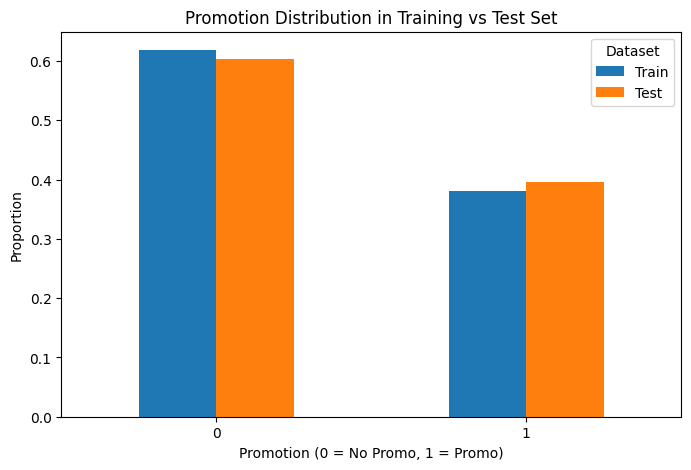

In [7]:
EDA.check_distribution_train_test_data()

#### In the test and train data the promotion value distribution is almost the same

In [8]:
EDA.merge_store_data()

2024-09-20 15:51:26,679 - INFO - Merging training data with store data...
2024-09-20 15:51:26,871 - INFO - Merging completed. New training data shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:

EDA.df_basic_info()

2024-09-20 15:09:44,285 - INFO - Describing the training data...


,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [10]:
EDA.missing_percentage()

,Column,Missing Percentage
Promo2SinceWeek,Promo2SinceWeek,49.943620
PromoInterval,PromoInterval,49.943620
Promo2SinceYear,Promo2SinceYear,49.943620
CompetitionOpenSinceYear,CompetitionOpenSinceYear,31.787764
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,31.787764
CompetitionDistance,CompetitionDistance,0.259730
DayOfWeek,DayOfWeek,0.000000
Store,Store,0.000000
Date,Date,0.000000
Sales,Sales,0.000000


In [11]:
EDA.data_types()

,Column,Data Type
StoreType,StoreType,object
StateHoliday,StateHoliday,object
Assortment,Assortment,object
PromoInterval,PromoInterval,object
Date,Date,object
CompetitionDistance,CompetitionDistance,float64
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,CompetitionOpenSinceYear,float64
Promo2SinceWeek,Promo2SinceWeek,float64
Promo2SinceYear,Promo2SinceYear,float64


In [12]:
EDA.outlier_check_perc()

,Column,Outlier Percentage
SchoolHoliday,SchoolHoliday,17.864667
Open,Open,16.989331
CompetitionDistance,CompetitionDistance,9.773628
Customers,Customers,3.745051
Sales,Sales,2.624239
CompetitionOpenSinceYear,CompetitionOpenSinceYear,1.440346
Store,Store,0.000000
DayOfWeek,DayOfWeek,0.000000
Promo,Promo,0.000000
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,0.000000


In [13]:
EDA.analyze_sales_holidays()

2024-09-20 14:50:46,464 - INFO - Analyzing sales data for holiday effects...


: 

2024-09-20 14:27:52,780 - INFO - Analyzing seasonal purchase trends...


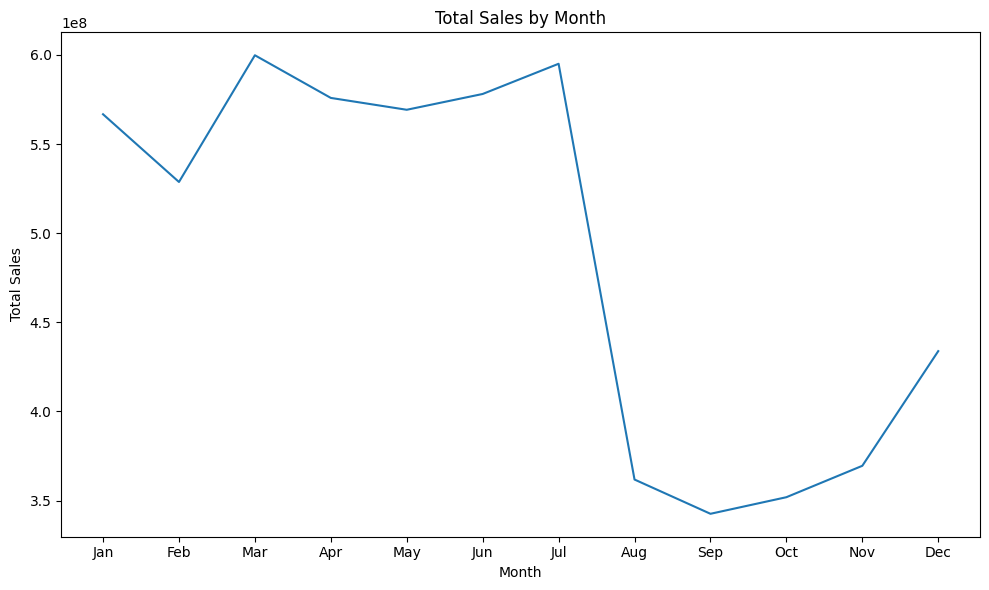

,Month,Total_Sales,Average_Sales,Total_Customers,Average_Customers
0,1,566728724,5465.395529,62384091,601.617172
1,2,528734410,5645.253150,58698139,626.715129
2,3,599831906,5784.578871,65265836,629.401958
3,4,575895295,5738.866916,63282009,630.612945
4,5,569248217,5489.639973,62423484,601.991263
5,6,578112775,5760.964375,62698087,624.794091
6,7,595059205,6064.915711,64425231,656.629781
7,8,361791202,5693.016554,40830683,642.496979
8,9,342570131,5570.246033,39017980,634.438699
9,10,351878728,5537.037419,40106150,631.095987


In [14]:
EDA.seasonal_purchase_treand_ana()

2024-09-20 14:27:53,417 - INFO - Analyzing customer sales correlations...


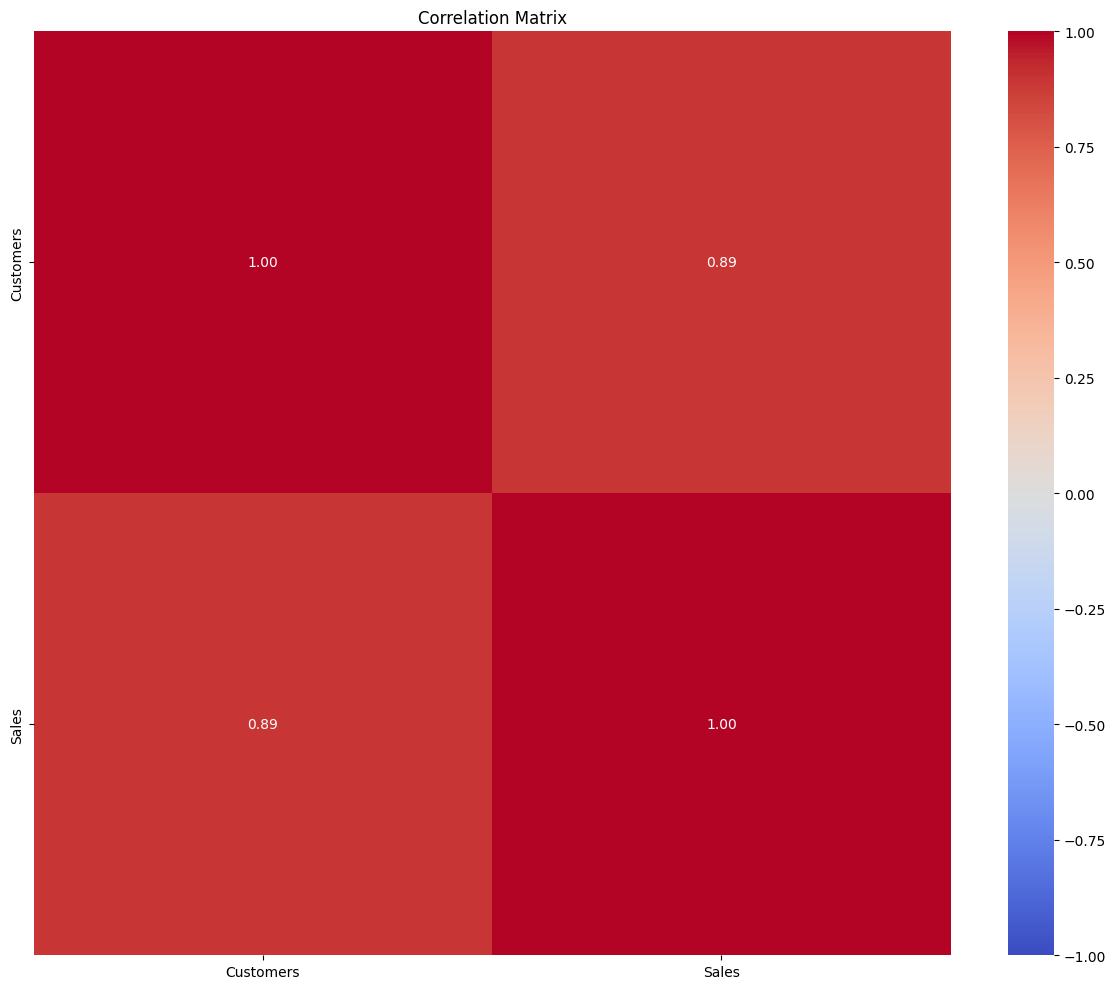

In [15]:
EDA.corr_customer_sales()

2024-09-20 14:27:54,228 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 14:27:54,248 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Average Sales by Promotion Status:
   Promo        Sales
0      0  4406.050805
1      1  7991.152046

Average Customers by Promotion Status:
   Promo   Customers
0      0  517.823542
1      1  820.098815


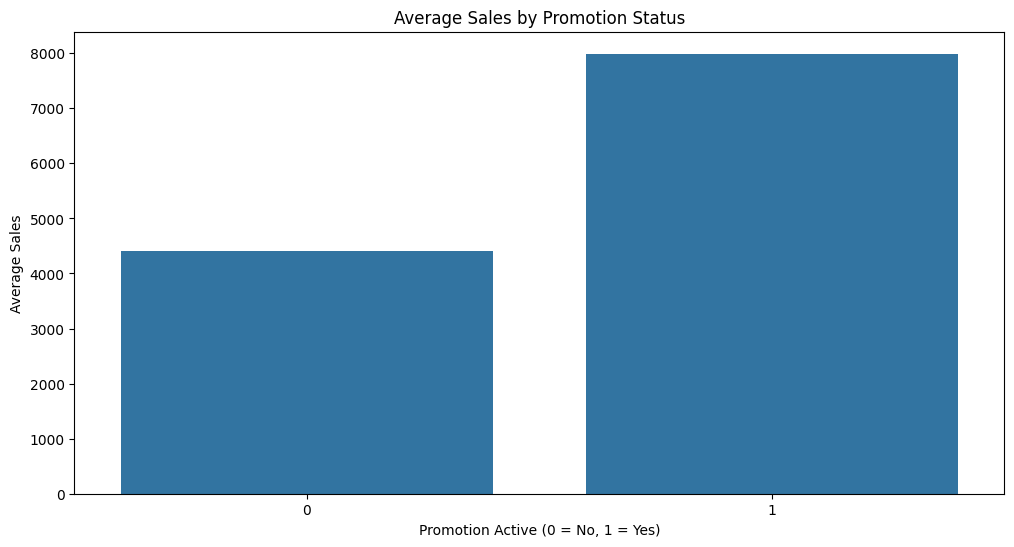

2024-09-20 14:27:54,396 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 14:27:54,396 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


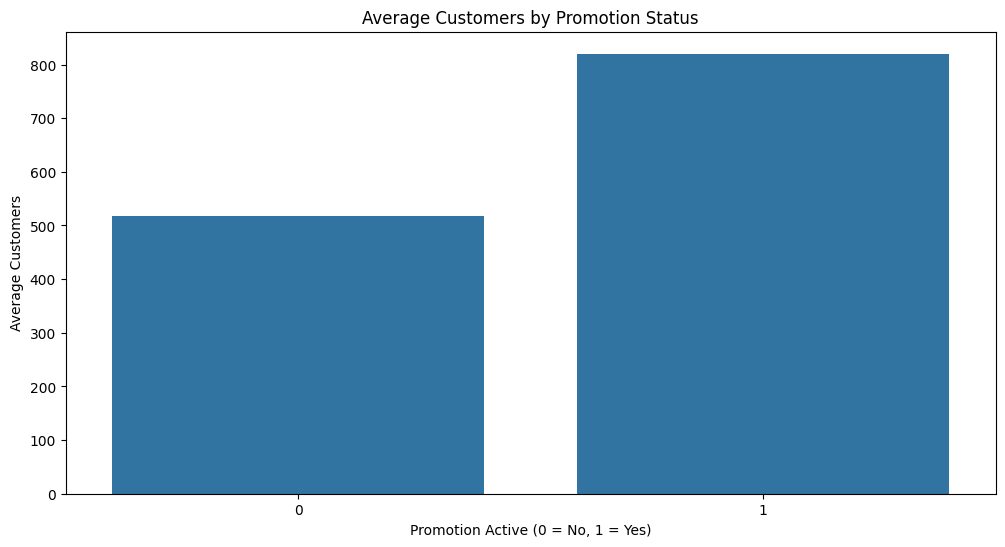

In [16]:
EDA.analyze_promotions()

### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

2024-09-20 14:27:58,145 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 14:27:58,154 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


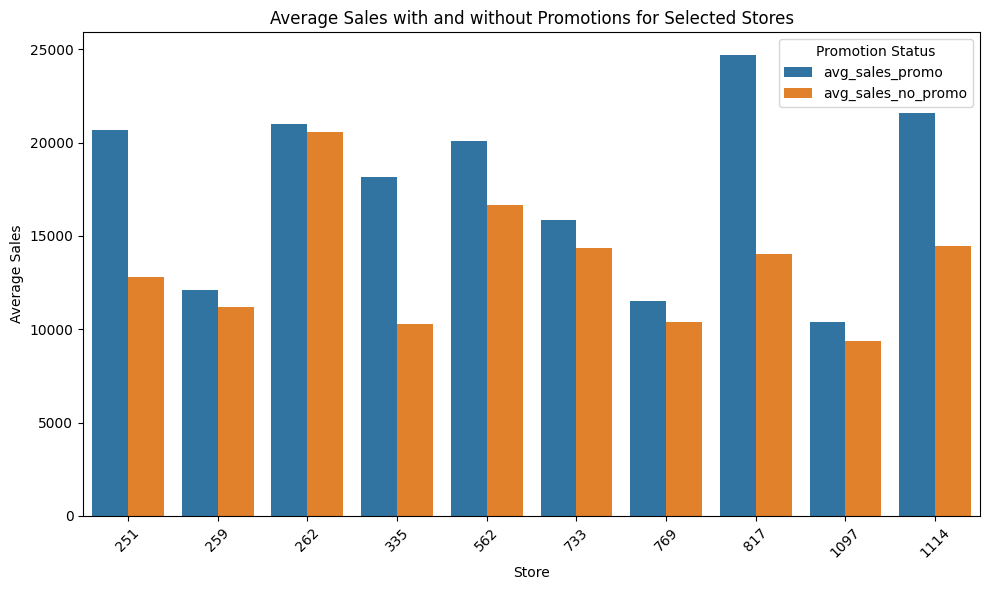

In [17]:
EDA.analyze_and_plot_promotions()

#### Trends of customer behavior during store opening and closing times


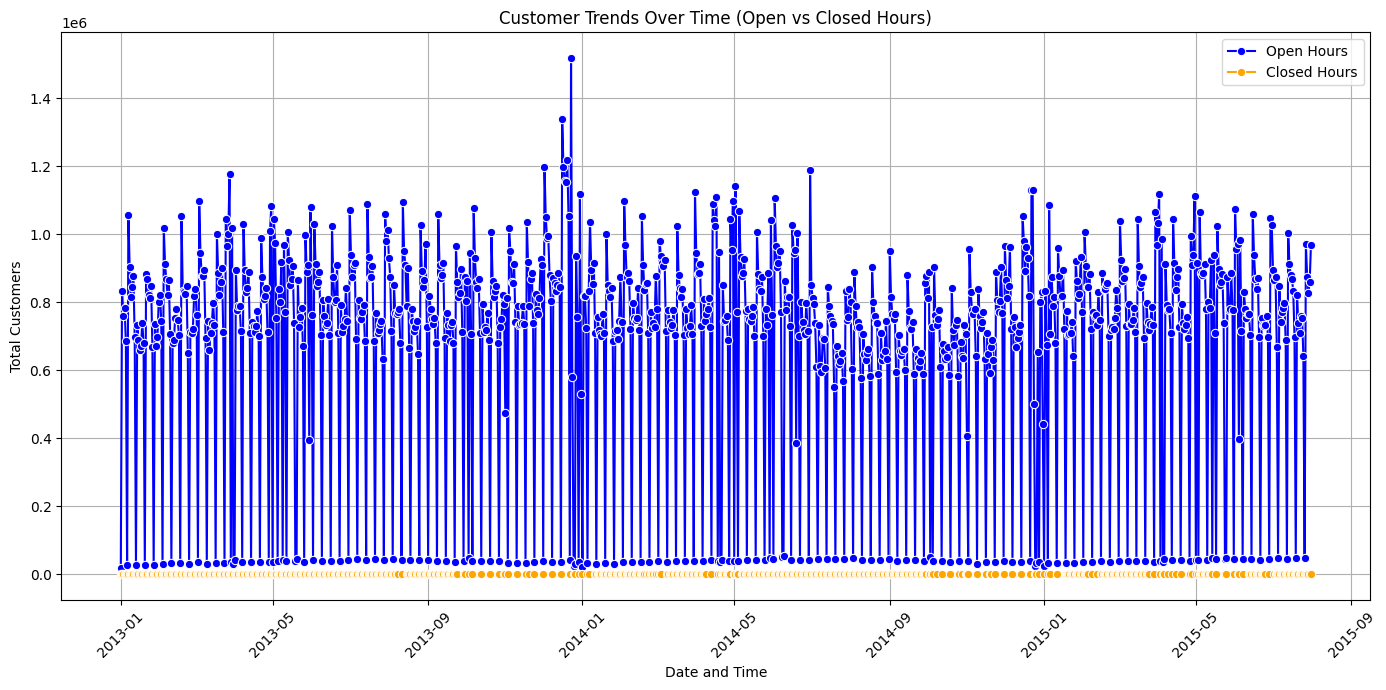

In [9]:
EDA.analyze_customer_behavior()

Columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Data Preview:
    Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a        

2024-09-20 15:47:52,502 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 15:47:52,550 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 15:47:52,969 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 15:47:52,985 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


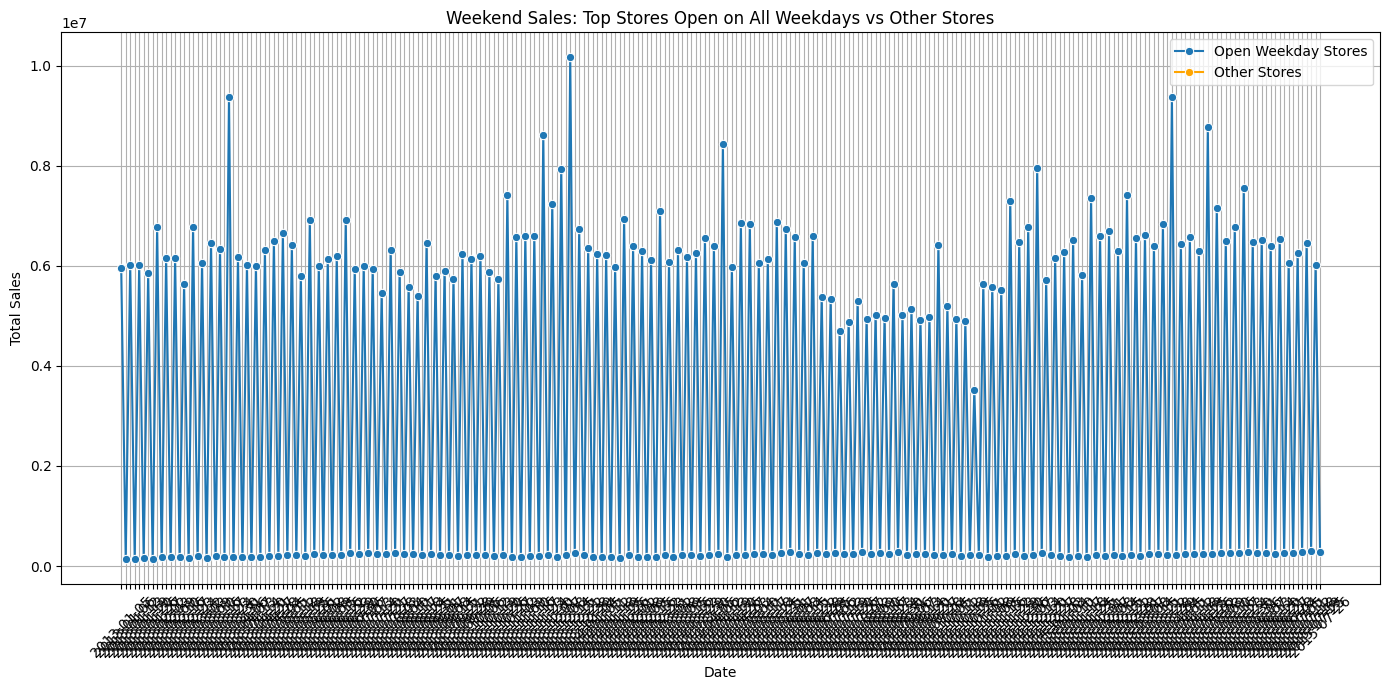

In [9]:
EDA.analyze_weekday_open_stores()

  Assortment       Sales
0          a  2945750070
1          b    70946312
2          c  2856484241


d:\10 A KAI 2/Week 4/Sales_Forcasting\Scripts\EDA.py:399: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_assortment, x='Assortment', y='Sales', palette='viridis')


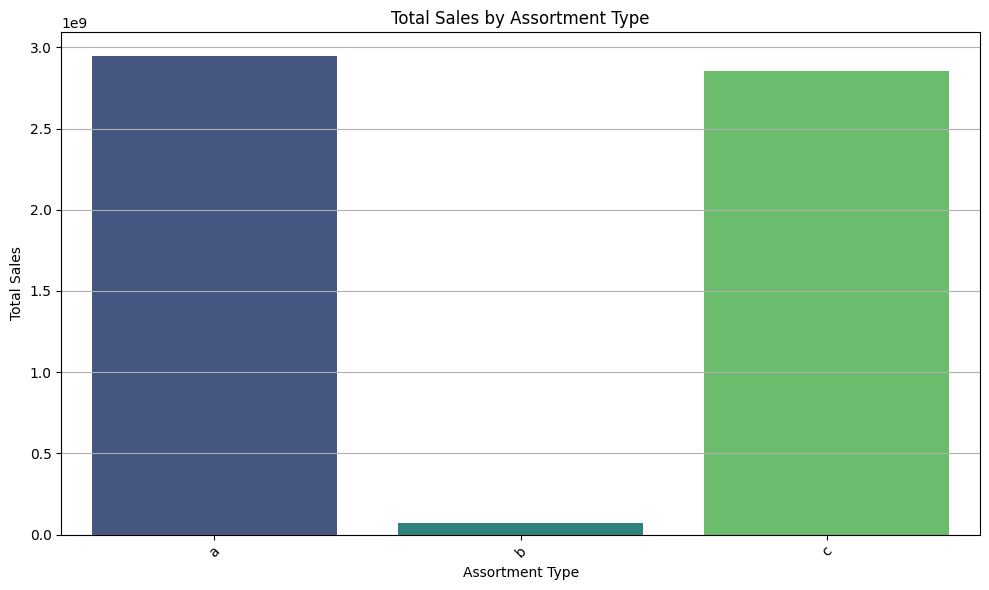

In [9]:
EDA.analyze_assortment_type_effect()

In [ ]:
EDA.analyze_competition_factors()